In [7]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('reviewsv5-1.csv')
df1 = []
df1.append(pd.read_csv('reviewsv5-2_0-13709.csv'))
df1.append(pd.read_csv('reviewsv5-2_13710-18248.csv'))
df1.append(pd.read_csv('reviewsv5-2_18249-18428.csv'))
df1.append(pd.read_csv('reviewsv5-2_18429-24105.csv'))
df1.append(pd.read_csv('reviewsv5-2_24106-27419.csv'))
df1.append(pd.read_csv('reviewsv5-2_27420-41129.csv'))

In [12]:
sum([len(x) for x in df1]),len(df)#correct
df.columns

Index(['Unnamed: 0', 'Band', 'Album', 'Author', 'Score', 'Date', 'Year',
       'Review', 'Sentiment', 'Length', 'Link'],
      dtype='object')

In [13]:
status = []
country = []
genre = []
themes = []
formed = []
texts = []
for i in range(6):
    for i1 in range(len(df1[i])):
        status.append(df1[i].Status[i1])
        country.append(df1[i].Country[i1])
        genre.append(df1[i].Genre[i1])
        themes.append(df1[i].Themes[i1])
        formed.append(df1[i].Formed[i1])
        if 'Texts' in list(df1[i].columns):
            texts.append(df1[i].Texts[i1])
        else:
            texts.append(df1[i].Text[i1])


In [14]:
df['Formed'] = formed
df['Country'] = country
df['Themes'] = themes
df['Status'] = status
df['Genre'] = genre
df['Texts'] = texts

In [15]:
df

,Unnamed: 0,Band,Album,Author,Score,Date,Year,Review,Sentiment,Length,Link,Formed,Country,Themes,Status,Genre,Texts
0,0,Meshuggah,Chaosphere,SpookyApparition,82,July 11 2002,2002,Technical metal at it's finest.,0.0000,31,https://www.metal-archives.com/reviews/Meshugg...,1987.0,Sweden,"Future, Consciousness, Society, Chaos, Apocaly...",Active,"Technical Groove/Thrash Metal (early), Djent (...",I originally bought Chaosphere in late 2000......
1,1,Carcass,Necroticism_-_Descanting_the_Insalubrious,SpookyApparition,88,July 14 2002,2002,Carcass at their finest.,0.0000,24,https://www.metal-archives.com/reviews/Carcass...,1986.0,United Kingdom,"Gore, Pathology, Medical, Politics, Society",Active,Goregrind/Grindcore (early); Melodic Death Met...,A midpoint between Carcass' early grind albums...
2,2,Nightwish,Angels_Fall_First,MarkRyan,90,July 15 2002,2002,On par with their other stuff...,0.0000,32,https://www.metal-archives.com/reviews/Nightwi...,1996.0,Finland,"Love, Nature, Astrology, Religion, Fantasy, Be...",Active,Symphonic Power Metal (early); Symphonic Metal...,"I'm not hard-core into metal at all, really, b..."
3,3,Iced_Earth,Dark_Genesis,Fear,87,July 16 2002,2002,Brilliance in Repackaging,0.5994,25,https://www.metal-archives.com/reviews/Iced_Ea...,1988.0,United States,"Horror, Fantasy, Literature, Mythology, Histor...",Active,Power/Thrash Metal,"This is not a new album, but in fact, five alb..."
4,4,Blind_Guardian,A_Night_at_the_Opera,Esoteric,70,July 16 2002,2002,Somewhat Disappointing,-0.4417,22,https://www.metal-archives.com/reviews/Blind_G...,1986.0,Germany,"Epic tales, Legends/Myths, Fantasy, Tolkien, L...",Active,Speed Metal (early); Power Metal (later),I've been trying for months to come up with an...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41125,41125,Flamen,Furor_Lunae,RapeTheDead,66,December 3 2019,2019,please tell me this guy's not a nazi,0.3182,36,https://www.metal-archives.com/reviews/Flamen/...,2012.0,Italy,"Traditions, Myths, Spiritual",Active,Medieval/Melodic Black Metal,My expectations are constantly on edge with th...
41126,41126,Rising_Moon,Hate_from_Heaven,RapeTheDead,36,December 3 2019,2019,sounds like shit,-0.2732,16,https://www.metal-archives.com/reviews/Rising_...,1998.0,Italy,"Inner Struggles, Society, Technology, Aliens",On hold,Melodic Death Metal,Rising Moon actually wrote some fantastic musi...
41127,41127,Slavehouse,Taste_in_Pain,Thumbman,90,December 3 2019,2019,Scorpion Whip,0.0000,13,https://www.metal-archives.com/reviews/Slaveho...,2013.0,United States,NaN,Active,Black Metal/Punk,Fallen Empire was a treasure trove for weird a...
41128,41128,Warcrab,Warcrab,gasmask_colostomy,74,December 3 2019,2019,Crabby by nature,0.0000,16,https://www.metal-archives.com/reviews/Warcrab...,2009.0,United Kingdom,NaN,Active,Death/Sludge Metal,I’m not sure that it matters given that the na...


In [54]:
df.to_csv('reviewsv6-2.csv', index = False)

In [38]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
sentiments = []
def isNaN(num):
    return num != num

for item in df['Texts']:
    if isNaN(item):
        sentiments.append(np.nan)
        continue
    sentiment = analyzer.polarity_scores(item)['compound']
    sentiments.append(sentiment)

df['Sentiment'] = sentiments

In [41]:
lengths = []
for item in df['Texts']:
    if isNaN(item):
        lengths.append(np.nan)
        continue
    lengths.append(len(item))
df['Length'] = lengths

In [39]:
len(sentiments)

41130

In [37]:
tmp = set()
def isNaN(num):
    return num != num
for i in range(len(df)):
    #print(df.Themes[i])
    if isNaN(df.Themes[i]):
        break
    s = df.Themes[i].split()
    for i1 in range(len(s)):
        if s[i1][-1] == ',':
            s[i1] = s[i1][:-1]
        tmp.add(s[i1])
        
print(len(tmp))
    

58


In [52]:
df

,Band,Album,Author,Score,Date,Year,Review,Sentiment,Length,Link,Formed,Country,Themes,Status,Genre,Texts
0,Meshuggah,Chaosphere,SpookyApparition,82,July 11 2002,2002,Technical metal at it's finest.,0.9728,1371.0,https://www.metal-archives.com/reviews/Meshugg...,1987.0,Sweden,"Future, Consciousness, Society, Chaos, Apocaly...",Active,"Technical Groove/Thrash Metal (early), Djent (...",I originally bought Chaosphere in late 2000......
1,Carcass,Necroticism_-_Descanting_the_Insalubrious,SpookyApparition,88,July 14 2002,2002,Carcass at their finest.,0.8479,1254.0,https://www.metal-archives.com/reviews/Carcass...,1986.0,United Kingdom,"Gore, Pathology, Medical, Politics, Society",Active,Goregrind/Grindcore (early); Melodic Death Met...,A midpoint between Carcass' early grind albums...
2,Nightwish,Angels_Fall_First,MarkRyan,90,July 15 2002,2002,On par with their other stuff...,0.9951,1498.0,https://www.metal-archives.com/reviews/Nightwi...,1996.0,Finland,"Love, Nature, Astrology, Religion, Fantasy, Be...",Active,Symphonic Power Metal (early); Symphonic Metal...,"I'm not hard-core into metal at all, really, b..."
3,Iced_Earth,Dark_Genesis,Fear,87,July 16 2002,2002,Brilliance in Repackaging,0.9976,1618.0,https://www.metal-archives.com/reviews/Iced_Ea...,1988.0,United States,"Horror, Fantasy, Literature, Mythology, Histor...",Active,Power/Thrash Metal,"This is not a new album, but in fact, five alb..."
4,Blind_Guardian,A_Night_at_the_Opera,Esoteric,70,July 16 2002,2002,Somewhat Disappointing,0.5494,1362.0,https://www.metal-archives.com/reviews/Blind_G...,1986.0,Germany,"Epic tales, Legends/Myths, Fantasy, Tolkien, L...",Active,Speed Metal (early); Power Metal (later),I've been trying for months to come up with an...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41125,Flamen,Furor_Lunae,RapeTheDead,66,December 3 2019,2019,please tell me this guy's not a nazi,0.9989,5863.0,https://www.metal-archives.com/reviews/Flamen/...,2012.0,Italy,"Traditions, Myths, Spiritual",Active,Medieval/Melodic Black Metal,My expectations are constantly on edge with th...
41126,Rising_Moon,Hate_from_Heaven,RapeTheDead,36,December 3 2019,2019,sounds like shit,-0.9809,3412.0,https://www.metal-archives.com/reviews/Rising_...,1998.0,Italy,"Inner Struggles, Society, Technology, Aliens",On hold,Melodic Death Metal,Rising Moon actually wrote some fantastic musi...
41127,Slavehouse,Taste_in_Pain,Thumbman,90,December 3 2019,2019,Scorpion Whip,-0.9561,2704.0,https://www.metal-archives.com/reviews/Slaveho...,2013.0,United States,NaN,Active,Black Metal/Punk,Fallen Empire was a treasure trove for weird a...
41128,Warcrab,Warcrab,gasmask_colostomy,74,December 3 2019,2019,Crabby by nature,-0.8044,2935.0,https://www.metal-archives.com/reviews/Warcrab...,2009.0,United Kingdom,NaN,Active,Death/Sludge Metal,I’m not sure that it matters given that the na...


c:\users\jzheng\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\jzheng\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 6838.,  1045.,   622.,   448.,   325.,   287.,   457.,   811.,
         1405., 28825.]),
 array([-9.9980e-01, -7.9982e-01, -5.9984e-01, -3.9986e-01, -1.9988e-01,
         1.0000e-04,  2.0008e-01,  4.0006e-01,  6.0004e-01,  8.0002e-01,
         1.0000e+00]),
 <a list of 10 Patch objects>)

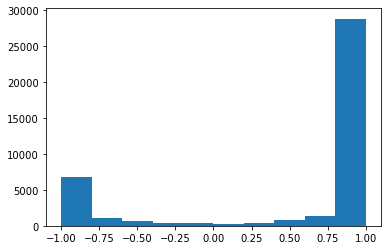

In [57]:
import matplotlib.pyplot as plt
plt.hist(df['Sentiment'])